# 0. Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import pandas as pd
import seaborn as sns

# 1. Fundamentals

* Intro to tensors
* Manipulate
* Aggregate
* Math ops
* GPU based

## 1.1. Intro

In [ ]:
tf.__version__

'2.17.0'

### 1.1.1 tf.constant()

In [ ]:
# Creating constant tensors
x_const_0 = tf.constant(3)
x_const_1 = tf.constant([1,2,3])
x_const_2 = tf.constant([[1,2,3],[4,5,6]])
tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [ ]:
x_const_0

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
x_const_1

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
x_const_2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
# Number of dimensions
print(x_const_0.ndim)
print(x_const_1.ndim)
print(x_const_2.ndim)
print(tensor.ndim)

0
1
2
3


In [ ]:
# Matrix with specific data type
x_dtype = tf.constant([1,2,3], dtype=tf.float64)

### 1.1.2 tf.Variable()

In [ ]:
x_var_0 = tf.Variable(7)
x_var_1 = tf.Variable([10,7])
x_var_2 = tf.Variable([[10,7],[15,8]])

In [ ]:
# use .assign() to change value
x_var_1[0].assign(5)
x_var_1

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 7], dtype=int32)>

### 1.1.3 tf.random()

In [ ]:
x_rand_uniform = tf.random.Generator.from_seed(42).uniform(shape = [5,2])
x_rand_uniform

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.7493447 , 0.73561966],
       [0.45230794, 0.49039817],
       [0.1889317 , 0.52027524],
       [0.8736881 , 0.46921718],
       [0.63932586, 0.6467117 ]], dtype=float32)>

In [ ]:
x_rand_normal = tf.random.normal(shape = [1,2])
x_rand_normal

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.711994 , 1.4254332]], dtype=float32)>

### 1.1.4 Shuffling

In [ ]:
tf.random.set_seed(42) # global seed
x_shuffled = tf.random.shuffle(x_rand_uniform, seed=42) # operation seed
x_shuffled

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.8736881 , 0.46921718],
       [0.7493447 , 0.73561966],
       [0.45230794, 0.49039817],
       [0.1889317 , 0.52027524],
       [0.63932586, 0.6467117 ]], dtype=float32)>

### 1.1.5 Numpy to tf

In [ ]:
x_np = np.array([[1,2,3,4], [4,5,6,7], [8,9,0,10]])

In [ ]:
x_tf_constant = tf.constant(x_np)
x_tf_constant

<tf.Tensor: shape=(3, 4), dtype=int64, numpy=
array([[ 1,  2,  3,  4],
       [ 4,  5,  6,  7],
       [ 8,  9,  0, 10]])>

In [ ]:
x_tf_variable = tf.Variable(x_np)
x_tf_variable

<tf.Variable 'Variable:0' shape=(3, 4) dtype=int64, numpy=
array([[ 1,  2,  3,  4],
       [ 4,  5,  6,  7],
       [ 8,  9,  0, 10]])>

### 1.1.6 Special matrices

In [ ]:
x_zeros = tf.zeros([2,2,3])
x_zeros

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
x_ones = tf.ones([2,2,3])
x_ones

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [ ]:
x_eyes = tf.eye(5,3, [2,3])
x_eyes

<tf.Tensor: shape=(2, 3, 5, 3), dtype=float32, numpy=
array([[[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

### 1.1.7 Reshape

In [ ]:
x_reshape = tf.reshape(x_eyes, [3, 6, 5])
x_reshape

<tf.Tensor: shape=(3, 6, 5), dtype=float32, numpy=
array([[[1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

### 1.1.8 Tensor descriptors

In [ ]:
# Shape
x_tf_variable.shape

TensorShape([3, 4])

In [ ]:
# Rank
print(tf.rank(x_tf_variable))

tf.Tensor(2, shape=(), dtype=int32)


###  1.1.9 Slice and Dice

In [ ]:
tf_slice = x_tf_variable[:, 1]
print(tf_slice)

tf.Tensor([2 5 9], shape=(3,), dtype=int64)


In [ ]:
tf_dice = x_tf_variable[:2, :3]
print(tf_dice)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int64)


### 1.1.10 Transpose

In [ ]:
x_transpose = tf.transpose(x_tf_variable)
x_transpose

<tf.Tensor: shape=(4, 3), dtype=int64, numpy=
array([[ 1,  4,  8],
       [ 2,  5,  9],
       [ 3,  6,  0],
       [ 4,  7, 10]])>

## 1.2 Manipulate

`+`, `-`, `*`, `/`

### 1.2.1 Add

In [ ]:
# add to tensor
tensor = tf.constant([[10,7],[3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# Native operator
tf.add(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

### 1.2.3 Multiply

In [ ]:
# multiply to tensor scalar
tensor = tf.constant([[10,7],[3,4]])
tensor * 4

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[40, 28],
       [12, 16]], dtype=int32)>

In [ ]:
# Native operator
tf.multiply(tensor, 4)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[40, 28],
       [12, 16]], dtype=int32)>

### 1.2.3. Subtract

In [ ]:
# subtract to tensor scalar
tensor = tf.constant([[10,7],[3,4]])
tensor - 4

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 6,  3],
       [-1,  0]], dtype=int32)>

In [ ]:
# Native operator
tf.subtract(tensor, 4)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 6,  3],
       [-1,  0]], dtype=int32)>

### 1.2.4. Divide

In [ ]:
# divide to tensor scalar
tensor = tf.constant([[10,7],[3,4]])
tensor / 4

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2.5 , 1.75],
       [0.75, 1.  ]])>

In [ ]:
# Native operator
tf.divide(tensor, 4)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2.5 , 1.75],
       [0.75, 1.  ]])>

### 1.2.5 Cross Product

In [ ]:
m1 = tf.Variable([[1,2,3],[4,5,6]])
m2 = tf.Variable([[1,2], [3,4], [5,6]])

# Use native function
tf.linalg.matmul(m1, m2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[22, 28],
       [49, 64]], dtype=int32)>

In [ ]:
# Use python function
m1 @ m2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[22, 28],
       [49, 64]], dtype=int32)>

In [ ]:
tf.tensordot(m1, m2, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[22, 28],
       [49, 64]], dtype=int32)>

### 1.2.6 Change & check Dtype

In [ ]:
tf_cast = tf.cast(x_tf_variable, dtype=tf.float16)

In [ ]:
tf_cast.dtype

tf.float16

## 1.3 Aggregate

### 1.3.1 Mean

In [ ]:
tensor = tf.random.normal([17,10,4])

In [ ]:
tf_mean = tf.math.reduce_mean(tensor)
tf_mean

<tf.Tensor: shape=(), dtype=float32, numpy=-0.010355445>

### 1.3.2 Minimum

In [ ]:
tf_min = tf.math.reduce_min(tensor)
tf_min

<tf.Tensor: shape=(), dtype=float32, numpy=-3.815022>

### 1.3.3 Maximum

In [ ]:
tf_max = tf.math.reduce_max(tensor)
tf_max

<tf.Tensor: shape=(), dtype=float32, numpy=3.436285>

### 1.3.4 Sum

In [ ]:
tf_sum = tf.math.reduce_sum(tensor)
tf_sum

<tf.Tensor: shape=(), dtype=float32, numpy=-7.0417023>

### 1.3.5 One Hot

In [ ]:
tf_one_hot = tf.one_hot([[1,3,4], [2,6,7]], depth=8, on_value=True, off_value=False)
tf_one_hot

<tf.Tensor: shape=(2, 3, 8), dtype=bool, numpy=
array([[[False,  True, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False, False],
        [False, False, False, False,  True, False, False, False]],

       [[False, False,  True, False, False, False, False, False],
        [False, False, False, False, False, False,  True, False],
        [False, False, False, False, False, False, False,  True]]])>

## 1.4 Mathematics

### 1.4.1 Square

In [ ]:
tf_sqr = tf.math.square(tf.cast(tensor, dtype=tf.float32))
tf_sqr

<tf.Tensor: shape=(17, 10, 4), dtype=float32, numpy=
array([[[1.07235625e-01, 7.10018218e-01, 1.02037884e-01, 1.98120236e+00],
        [5.70282984e+00, 1.08003616e+00, 3.10609162e-01, 2.91283637e-01],
        [2.88806987e+00, 8.34843367e-02, 2.26987839e+00, 6.99853450e-02],
        [3.56676579e-01, 3.67532301e+00, 3.84947568e-01, 7.23184049e-01],
        [1.64874926e-01, 9.15571499e+00, 8.20557714e-01, 8.91380012e-02],
        [5.09023741e-02, 5.80102026e-01, 3.57858181e+00, 8.80728185e-01],
        [6.06096685e-01, 2.24097118e-01, 9.55949962e-01, 6.09813593e-02],
        [4.23279069e-02, 2.76279867e-01, 1.05040915e-01, 6.47910754e-04],
        [1.13177616e-02, 4.05702144e-01, 1.34632432e+00, 6.28684983e-02],
        [1.74126744e-01, 1.61007807e-01, 2.00093532e+00, 3.51869226e-01]],

       [[2.76131773e+00, 1.12675644e-01, 1.16977822e-02, 5.51295392e-02],
        [3.21134895e-01, 1.28306121e-01, 7.86744595e-01, 2.78201073e-01],
        [4.95647639e-01, 1.11697987e-01, 4.68274169e-02, 

### 1.4.2 Square Root

In [ ]:
tf_sqrt = tf.math.sqrt(tf.cast(tf_sqr, dtype=tf.float32))
tf_sqrt

<tf.Tensor: shape=(17, 10, 4), dtype=float32, numpy=
array([[[3.27468514e-01, 8.42625797e-01, 3.19433689e-01, 1.40755188e+00],
        [2.38805985e+00, 1.03924787e+00, 5.57323217e-01, 5.39707005e-01],
        [1.69943225e+00, 2.88936555e-01, 1.50661159e+00, 2.64547437e-01],
        [5.97224057e-01, 1.91711318e+00, 6.20441437e-01, 8.50402296e-01],
        [4.06047940e-01, 3.02584124e+00, 9.05846417e-01, 2.98559874e-01],
        [2.25615546e-01, 7.61644304e-01, 1.89171398e+00, 9.38471198e-01],
        [7.78522134e-01, 4.73388970e-01, 9.77726936e-01, 2.46944040e-01],
        [2.05737472e-01, 5.25623322e-01, 3.24100167e-01, 2.54540909e-02],
        [1.06384970e-01, 6.36947513e-01, 1.16031218e+00, 2.50735909e-01],
        [4.17284966e-01, 4.01257783e-01, 1.41454422e+00, 5.93185663e-01]],

       [[1.66172135e+00, 3.35671932e-01, 1.08156286e-01, 2.34796807e-01],
        [5.66687644e-01, 3.58198434e-01, 8.86986256e-01, 5.27447701e-01],
        [7.04022467e-01, 3.34212482e-01, 2.16396436e-01, 

### 1.4.3 log

In [ ]:
tf_log = tf.math.log(tensor)
tf_log

<tf.Tensor: shape=(17, 10, 4), dtype=float32, numpy=
array([[[-1.11636341e+00,             nan, -1.14120555e+00,
                     nan],
        [            nan,             nan,             nan,
         -6.16728902e-01],
        [ 5.30294240e-01, -1.24154818e+00,             nan,
                     nan],
        [            nan,             nan,             nan,
         -1.62045747e-01],
        [            nan,             nan, -9.88854989e-02,
         -1.20878482e+00],
        [            nan,             nan,             nan,
                     nan],
        [-2.50357836e-01,             nan, -2.25248542e-02,
         -1.39859354e+00],
        [-1.58115435e+00,             nan, -1.12670267e+00,
         -3.67087889e+00],
        [            nan,             nan,  1.48689076e-01,
         -1.38335502e+00],
        [            nan, -9.13151205e-01,             nan,
                     nan]],

       [[            nan, -1.09162104e+00, -2.22417808e+00,
         -1.449

## 1.5 GPU interaction

### 1.5.1 Check devices on machine

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
tf.config.list_physical_devices('GPU')

[]

### 1.5.2 Load tensor on CPU and operate on GPU

In [ ]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


# 2. NN Regression

Estimate the relation between independent and dependent variables.
Hyper params to tune:

* Add layers
* Increase hidden layers
* Change activation fucntion
* Change optimization function
* Change the learning rate

In [ ]:
# Dummy data
X = np.arange(-10, 10, 0.02)
Y = np.arange(9, 12, 0.003)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_test, Y_train, Y_test = tf.reshape(tf.constant(X_train), shape=[800,1]), tf.reshape(tf.constant(X_test), shape=[200,1]), tf.reshape(tf.constant(Y_train), shape=[800,1]), tf.reshape(tf.constant(Y_test), shape=[200,1])

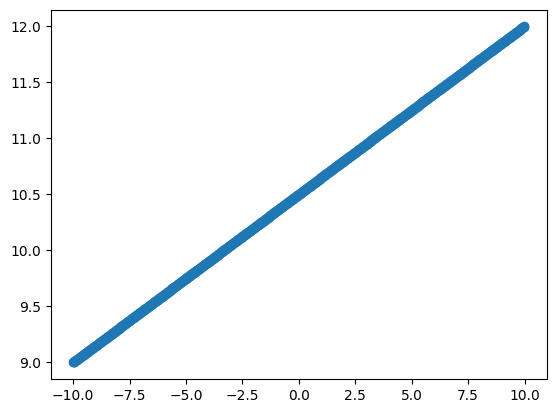

In [ ]:
# Show data
plt.scatter(X, Y)

## 2.1 Model Definition

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1), # Input layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.LeakyReLU(negative_slope=0.3), # LR
    tf.keras.layers.Dense(10),
    tf.keras.layers.LeakyReLU(negative_slope=0.3), # LR
    tf.keras.layers.Dense(1)
], name="Model_1")

## 2.2 Model compiliation

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # Tweak LR
    loss = tf.keras.losses.Huber(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()],
)

## 2.3 Model Fitting

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs=200,
                    validation_split=0.2,
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10, # Model patience
                                                                  min_delta=0.05)]) # Delta of val_loss < 0.05

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.4452 - mean_absolute_error: 8.9432 - val_loss: 4.3474 - val_mean_absolute_error: 4.8335
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8770 - mean_absolute_error: 4.3590 - val_loss: 3.0531 - val_mean_absolute_error: 3.5304
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9487 - mean_absolute_error: 3.4137 - val_loss: 2.5932 - val_mean_absolute_error: 3.0669
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6011 - mean_absolute_error: 3.0768 - val_loss: 1.8999 - val_mean_absolute_error: 2.3660
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5755 - mean_absolute_error: 2.0305 - val_loss: 0.5143 - val_mean_absolute_error: 0.8991
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3962 - mean_absolute_error: 0.7549 - val_loss: 0.2675 - val_mean_absolute_error: 0.6516
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1604 - mean_absolute_error: 0.4689 - val_los

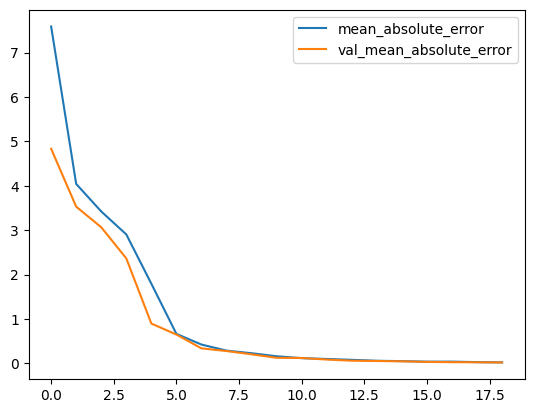

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['mean_absolute_error', 'val_mean_absolute_error'])
plt.show()

In [ ]:
model.predict(X_test[10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[9.418735]], dtype=float32)

In [ ]:
Y_test[1]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([9.249])>

## 2.4 Test set eval result

In [ ]:
# Fetch predictions
preds = []
test_loss = 0
for idx, (x, y) in enumerate(zip(X_test, Y_test)):
    preds.append(model.predict(x))

preds = tf.constant(preds)
# Calculate huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)
loss = huber_loss(Y_test, preds)
print(loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

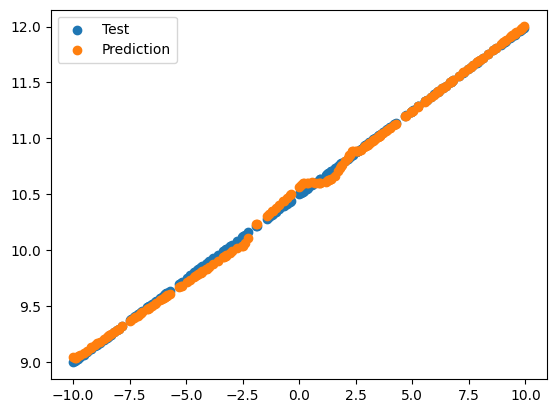

In [ ]:
plt.scatter(X_test, Y_test)
plt.scatter(X_test, preds)
plt.legend(['Test', 'Prediction'])
plt.show()

In [ ]:
losses = []
for idx, (x, y) in enumerate(zip(X_test, Y_test)):
    preds = model.predict(x)
    obsv = y
    losses.append(huber(np.abs(preds - obsv)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [ ]:
print(np.mean(losses))

0.00047327850360556853


In [ ]:
print(tf.squeeze(test_loss).numpy())

0


## 2.5 Model Summary

In [ ]:
model.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 10)                    │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (32, 10)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 10)                    │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (32, 10)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431 (1.69 KB)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 288 (1.13 KB)

## 2.6 Model Layers Viz

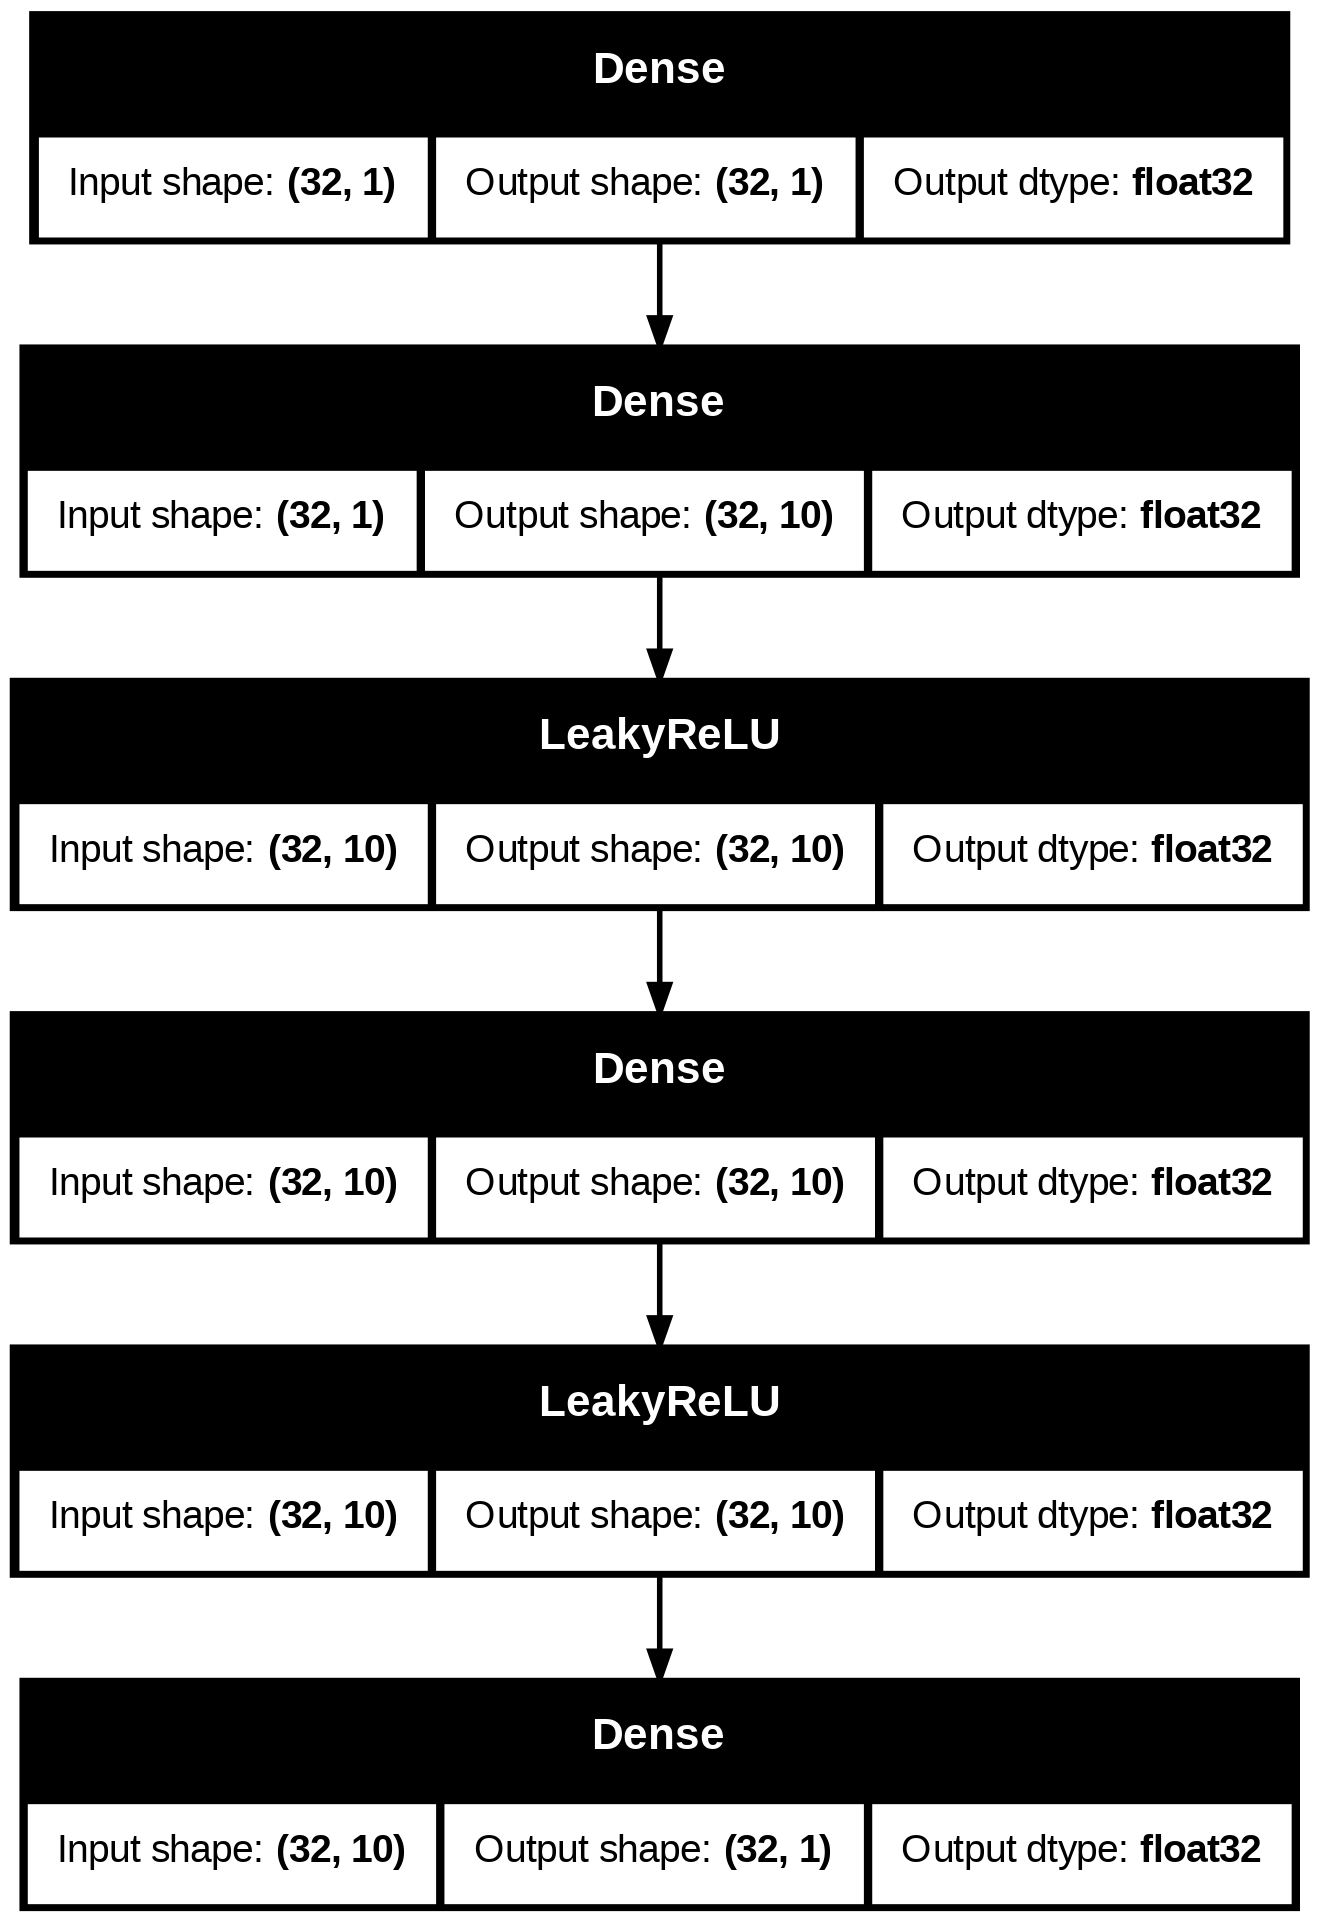

In [ ]:
plot_model(model, show_shapes=True, show_dtype=True)

## 2.7 Model Experiments

* Get more data
* Make model Larger
* Train for Longer

Experiment - 1:
1 layer for 100 epochs with MSE

Experiment - 2:
1 layer for 100 epochs with Huber

Experiment - 3:
1 layer for 200 epochs with MSE

Experiment - 4:
2 layers for 100 epochs with MSE

Experiment - 5:
2 layers for 100 epochs with Huber

Experiment - 6:
2 layers for 200 epochs with MSE


### 2.7.1 Models

In [ ]:
model_experiment_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(1)
], name="model_experiment_1")

In [ ]:
model_experiment_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(1)
], name="model_experiment_2")

In [ ]:
model_experiment_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(1)
], name="model_experiment_3")

In [ ]:
model_experiment_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(1)
], name="model_experiment_4")

In [ ]:
model_experiment_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(1)
], name="model_experiment_5")

In [ ]:
model_experiment_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(1)
], name="model_experiment_6")

### 2.7.2 Complitaion

In [ ]:
model_experiment_1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()],
)

In [ ]:
model_experiment_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.Huber(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()],
)

In [ ]:
model_experiment_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()],
)

In [ ]:
model_experiment_4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()],
)

In [ ]:
model_experiment_5.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.Huber(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()],
)

In [ ]:
model_experiment_6.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()],
)

### 2.7.3 Fit

In [ ]:
history_experiment_1 = model_experiment_1.fit(X_train,
                                              Y_train,
                                              epochs=100,
                                              validation_split=0.2,
                                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10, # Model patience
                                                                  min_delta=0.05)]) # Delta of val_loss < 0.05

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 75.5353 - mean_absolute_error: 8.2968 - val_loss: 16.7626 - val_mean_absolute_error: 3.5109
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.0113 - mean_absolute_error: 3.6805 - val_loss: 10.5272 - val_mean_absolute_error: 2.7195
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4389 - mean_absolute_error: 2.4387 - val_loss: 2.5632 - val_mean_absolute_error: 1.3828
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6698 - mean_absolute_error: 1.1129 - val_loss: 0.2588 - val_mean_absolute_error: 0.4560
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1416 - mean_absolute_error: 0.3089 - val_loss: 0.0525 - val_mean_absolute_error: 0.2046
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0535 - mean_absolute_error: 0.1933 - val_loss: 0.0374 - val_mean_absolute_error: 0.1563
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.1757 - val

In [ ]:
history_experiment_2 = model_experiment_2.fit(X_train,
                                              Y_train,
                                              epochs=100,
                                              validation_split=0.2,
                                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10, # Model patience
                                                                  min_delta=0.05)]) # Delta of val_loss < 0.05

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.4657 - mean_absolute_error: 8.9646 - val_loss: 2.8376 - val_mean_absolute_error: 3.3019
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6868 - mean_absolute_error: 3.1567 - val_loss: 1.6375 - val_mean_absolute_error: 2.0913
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1626 - mean_absolute_error: 1.5965 - val_loss: 0.1824 - val_mean_absolute_error: 0.3844
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1133 - mean_absolute_error: 0.3276 - val_loss: 0.0300 - val_mean_absolute_error: 0.2044
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 - mean_absolute_error: 0.1803 - val_loss: 0.0109 - val_mean_absolute_error: 0.1131
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0905 - val_loss: 0.0027 - val_mean_absolute_error: 0.0561
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mean_absolute_error: 0.0635 - val_los

In [ ]:
history_experiment_3 = model_experiment_3.fit(X_train,
                                              Y_train,
                                              epochs=200,
                                              validation_split=0.2,
                                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10, # Model patience
                                                                  min_delta=0.05)]) # Delta of val_loss < 0.05

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 61.5788 - mean_absolute_error: 7.2649 - val_loss: 22.2964 - val_mean_absolute_error: 4.0408
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.8999 - mean_absolute_error: 3.9973 - val_loss: 13.4683 - val_mean_absolute_error: 3.1145
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4119 - mean_absolute_error: 2.9986 - val_loss: 4.9877 - val_mean_absolute_error: 1.9201
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4061 - mean_absolute_error: 1.5355 - val_loss: 0.4071 - val_mean_absolute_error: 0.5435
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2220 - mean_absolute_error: 0.3877 - val_loss: 0.0893 - val_mean_absolute_error: 0.2445
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0816 - mean_absolute_error: 0.2193 - val_loss: 0.0213 - val_mean_absolute_error: 0.1022
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182 - mean_absolute_error: 0.1022 - va

In [ ]:
history_experiment_4 = model_experiment_4.fit(X_train,
                                              Y_train,
                                              epochs=100,
                                              validation_split=0.2,
                                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10, # Model patience
                                                                  min_delta=0.05)]) # Delta of val_loss < 0.05

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 66.1420 - mean_absolute_error: 7.4256 - val_loss: 4.7209 - val_mean_absolute_error: 1.8801
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6729 - mean_absolute_error: 1.2867 - val_loss: 0.2605 - val_mean_absolute_error: 0.4441
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1703 - mean_absolute_error: 0.3207 - val_loss: 0.0451 - val_mean_absolute_error: 0.1406
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.1180 - val_loss: 0.0109 - val_mean_absolute_error: 0.0928
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0708 - val_loss: 0.0058 - val_mean_absolute_error: 0.0626
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0589 - val_loss: 0.0039 - val_mean_absolute_error: 0.0471
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0466 - val_lo

In [ ]:
history_experiment_5 = model_experiment_5.fit(X_train,
                                              Y_train,
                                              epochs=100,
                                              validation_split=0.2,
                                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10, # Model patience
                                                                  min_delta=0.05)]) # Delta of val_loss < 0.05

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.7294 - mean_absolute_error: 6.2172 - val_loss: 2.8736 - val_mean_absolute_error: 3.3312
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1823 - mean_absolute_error: 2.6425 - val_loss: 0.2522 - val_mean_absolute_error: 0.6020
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2151 - mean_absolute_error: 0.5166 - val_loss: 0.1438 - val_mean_absolute_error: 0.4674
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0711 - mean_absolute_error: 0.3005 - val_loss: 0.0398 - val_mean_absolute_error: 0.2643
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0385 - mean_absolute_error: 0.2233 - val_loss: 0.0058 - val_mean_absolute_error: 0.0837
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0827 - val_loss: 0.0070 - val_mean_absolute_error: 0.1037
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0675 - val_los

In [ ]:
history_experiment_6 = model_experiment_6.fit(X_train,
                                              Y_train,
                                              epochs=200,
                                              validation_split=0.2,
                                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=10, # Model patience
                                                                  min_delta=0.05)]) # Delta of val_loss < 0.05

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 55.8777 - mean_absolute_error: 6.6374 - val_loss: 5.4118 - val_mean_absolute_error: 1.9901
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9770 - mean_absolute_error: 1.3486 - val_loss: 0.3305 - val_mean_absolute_error: 0.5055
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1838 - mean_absolute_error: 0.3603 - val_loss: 0.0555 - val_mean_absolute_error: 0.1902
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387 - mean_absolute_error: 0.1568 - val_loss: 0.0119 - val_mean_absolute_error: 0.0883
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0860 - val_loss: 0.0079 - val_mean_absolute_error: 0.0770
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0766 - val_loss: 0.0052 - val_mean_absolute_error: 0.0631
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0636 - val_lo

### 2.7.4 Loss curves

In [ ]:
history_experiment_1.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

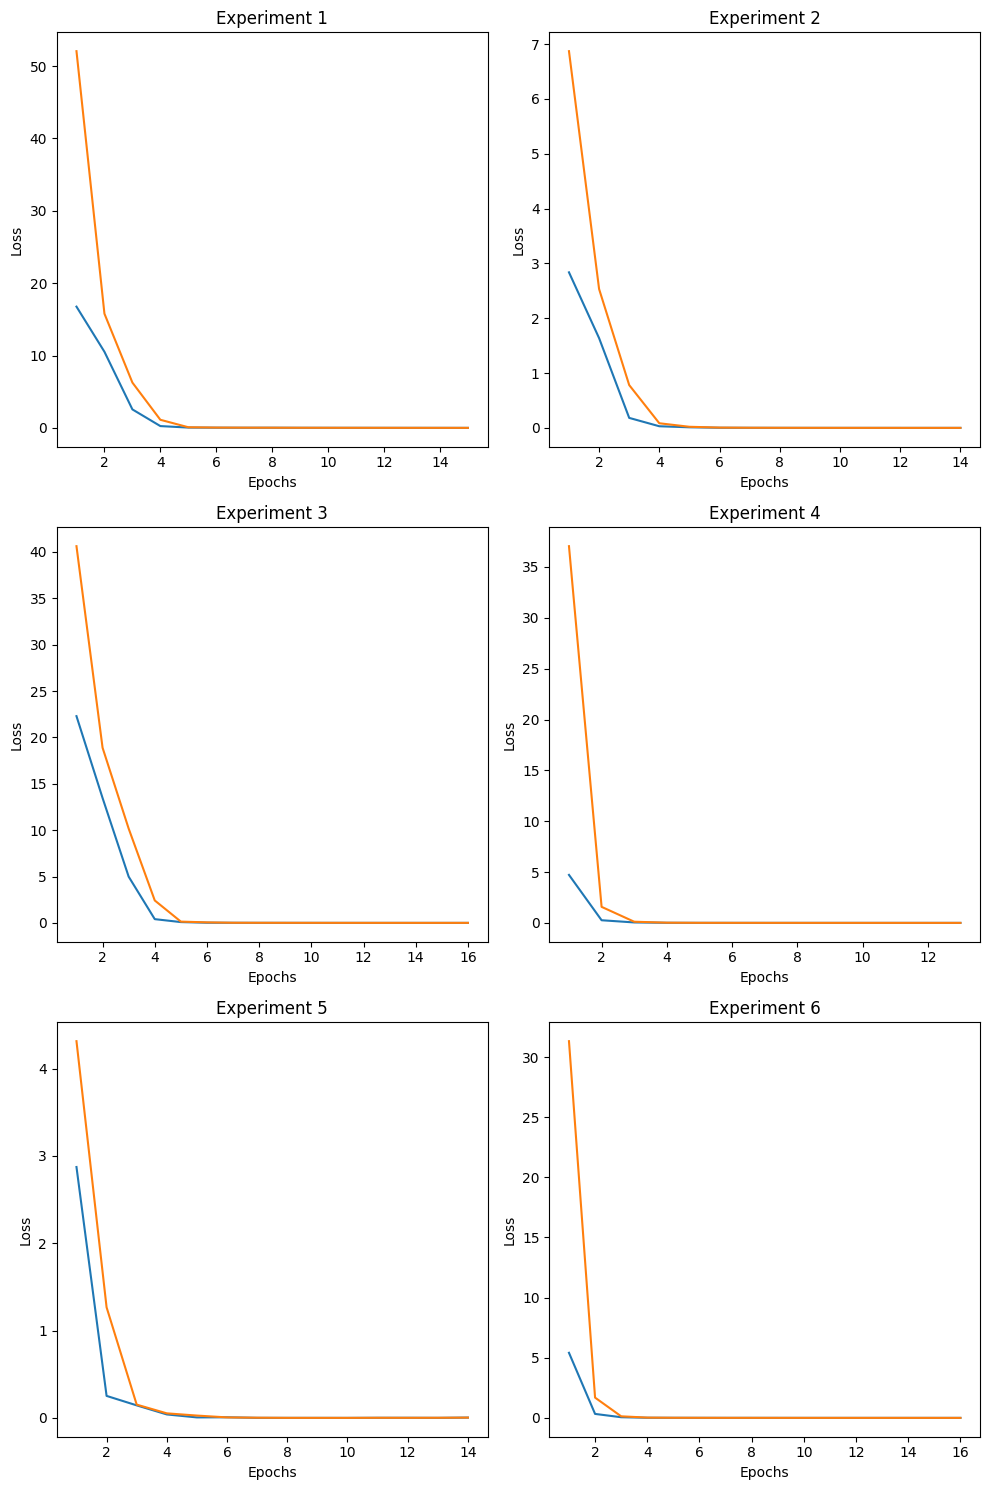

In [ ]:
histories = {
    "Experiment 1": history_experiment_1,
    "Experiment 2": history_experiment_2,
    "Experiment 3": history_experiment_3,
    "Experiment 4": history_experiment_4,
    "Experiment 5": history_experiment_5,
    "Experiment 6": history_experiment_6
}


# Create a 6x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Generate data for the line charts

for i in range(3):
    for j in range(2):
        idx = i * 2 + j + 1
        history = histories[f"Experiment {idx}"].history
        x = np.arange(1, len(history['loss']) + 1)
        train_loss = history['loss']
        val_loss = history['val_loss']
        axes[i, j].plot(x, val_loss)
        axes[i, j].plot(x, train_loss)
        axes[i, j].set_title(f"Experiment {idx}")
        axes[i, j].set_xlabel("Epochs")
        axes[i, j].set_ylabel("Loss")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


### 2.7.5 Preds v. Test

In [ ]:
models = {
    "Experiment 1": model_experiment_1,
    "Experiment 2": model_experiment_2,
    "Experiment 3": model_experiment_3,
    "Experiment 4": model_experiment_4,
    "Experiment 5": model_experiment_5,
    "Experiment 6": model_experiment_6
}

preds = {}
for i in tqdm(range(1, 7)):
    preds[f"Experiment {i}"] = tf.constant([models[f"Experiment {i}"].predict(x_sample, verbose=0) for x_sample in X_test])

100%|██████████| 6/6 [01:40<00:00, 16.80s/it]


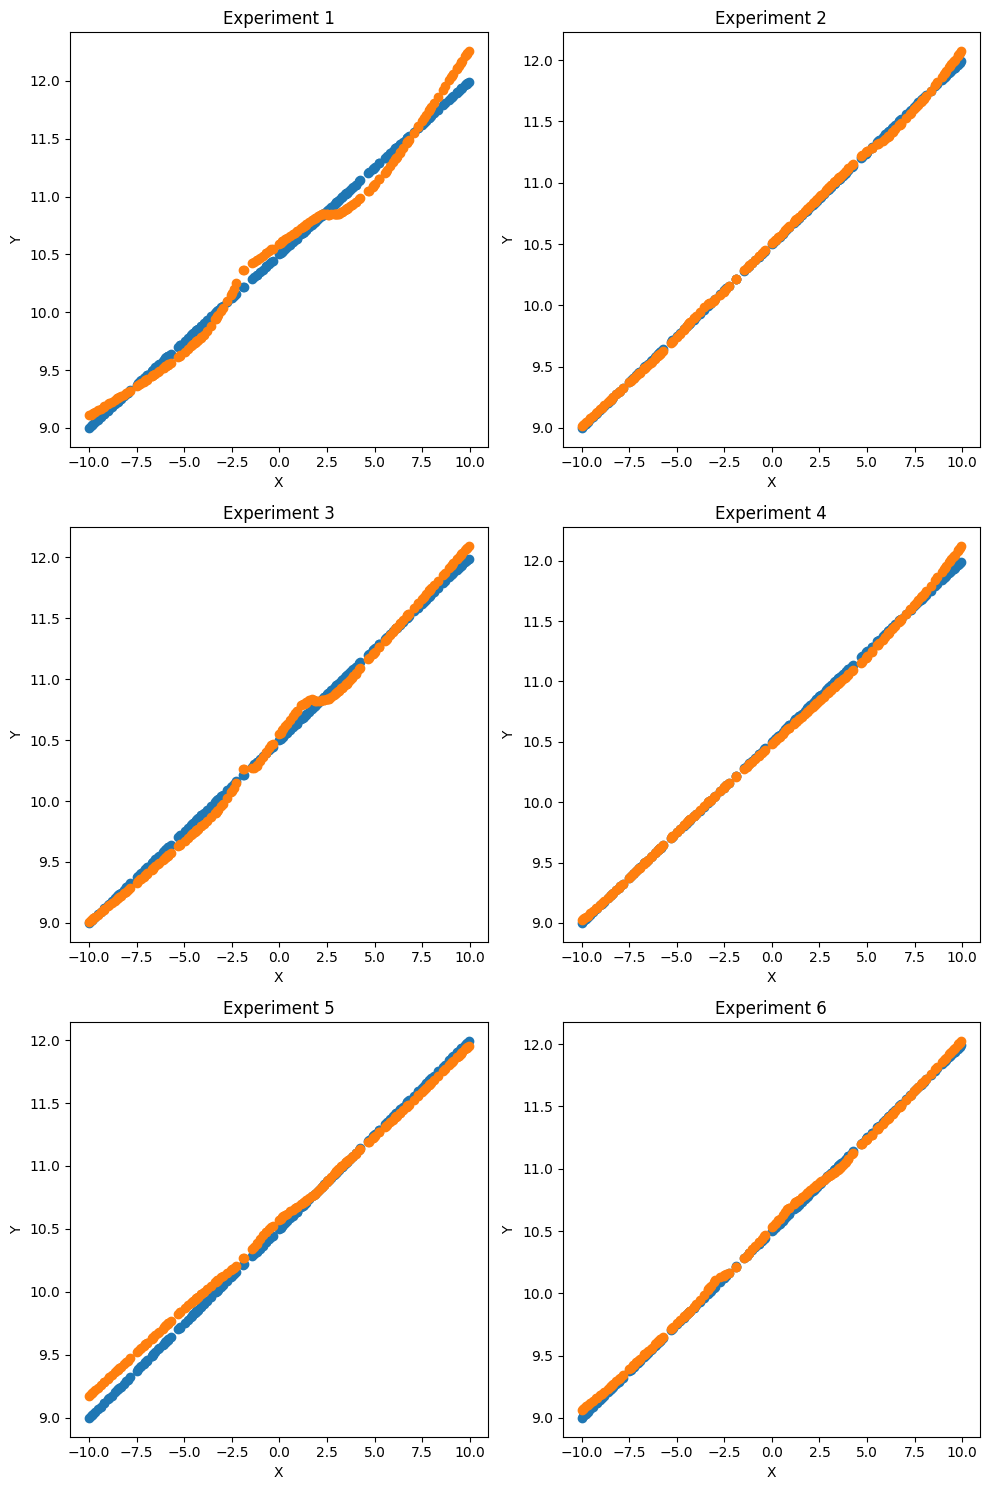

In [ ]:
# Create a 6x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Iterate through the data
for i in range(3):
    for j in range(2):
        idx = i * 2 + j + 1
        x = X_test
        y = Y_test
        pred = preds[f"Experiment {idx}"]
        axes[i, j].scatter(x, y)
        axes[i, j].scatter(x, pred)
        axes[i, j].set_title(f"Experiment {idx}")
        axes[i, j].set_xlabel("X")
        axes[i, j].set_ylabel("Y")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


### 2.7.8 Model save

SaveModel:


*   Saves model weights
*   Saves optimizer state
*   Saves the architecture



In [ ]:
# Save a model using SaveModel
model_experiment_4.export("model_experiment_4")

Saved artifact at 'model_experiment_4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_29')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139091506157120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139091504416544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139091506154480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139091504422000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139091504426576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139091504419712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139091504420768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139091504668640: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Save a model to h5 format
model_experiment_4.save("model_experiment_4.h5")

In [ ]:
# Save a model to keras format
model_experiment_4.save("model_experiment_4.keras")

# 3. NN Regression (Insurance data)

## 3.1 Load Data

In [ ]:
df = pd.read_csv("./data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3.2 EDA & Augmentation on data

### 3.2.1 Evaluate distribution of the column `BMI`

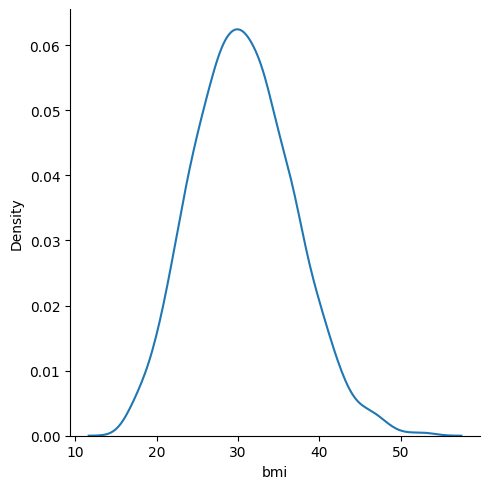

In [ ]:
sns.displot(df, x="bmi", kind="kde", bw_adjust=1)

### 3.2.2 Evaluate and adjust the column `charges`

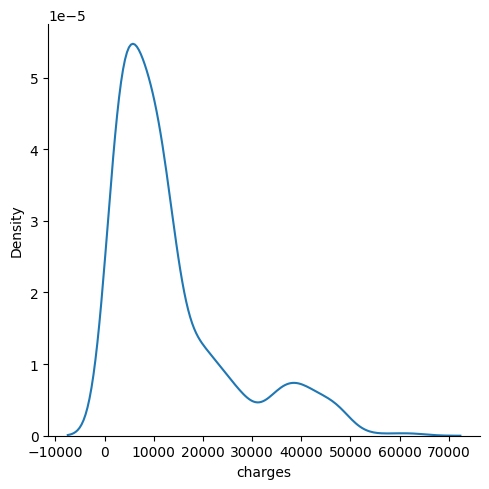

In [ ]:
sns.displot(df, x="charges", kind="kde", bw_adjust=1)

<Axes: >

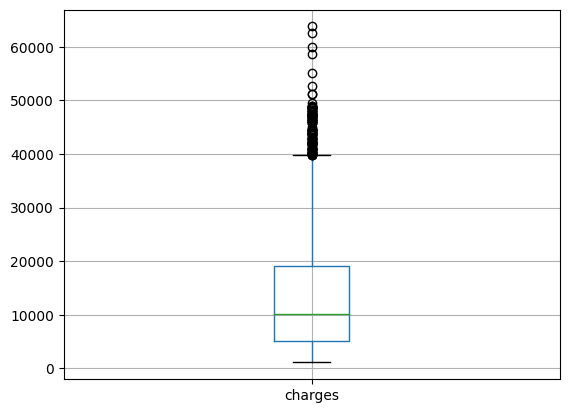

In [ ]:
df.boxplot(column=['charges'])

In [ ]:
 df['charges'].skew()

1.5158796580240388

In [ ]:
df['charges_log'] = np.log(df_onehot['charges'])

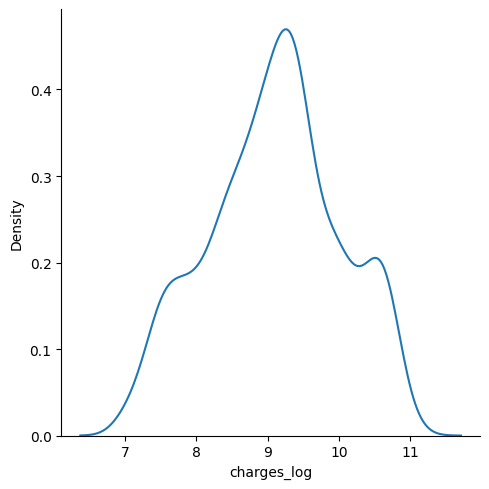

In [ ]:
sns.displot(df, x="charges_log", kind="kde", bw_adjust=1)

In [ ]:
df['charges_log'].skew()

-0.09009752473024582

### 3.2.3 Evaluate distribution of the coumns `age`

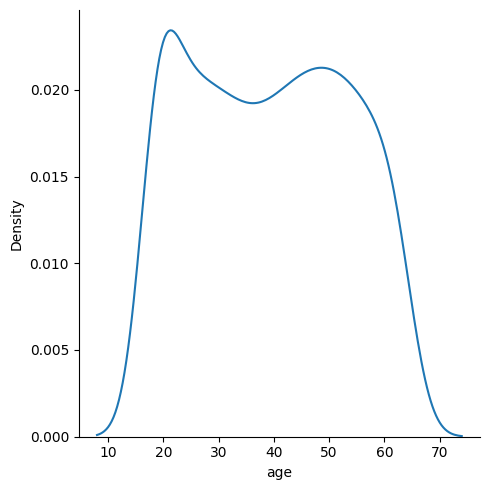

In [ ]:
sns.displot(df, x="age", kind="kde", bw_adjust=1)

### 3.2.4 Evaluate distribution of the column `children` and upsample the tuples with 4 or 5 children by duplication

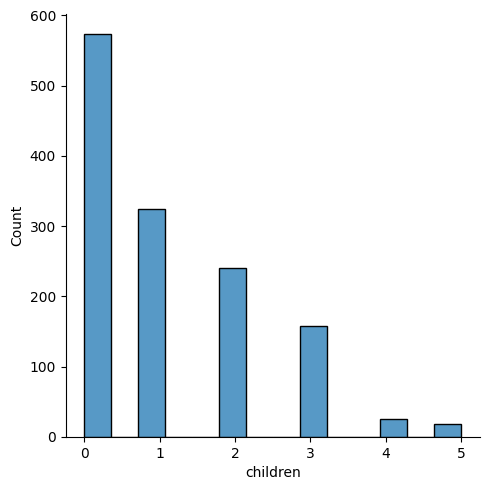

In [ ]:
sns.displot(df, x="children")

In [ ]:
df_4_5 = df[df["children"] >= 4]
df = pd.concat([df, df_4_5, df_4_5, df_4_5])

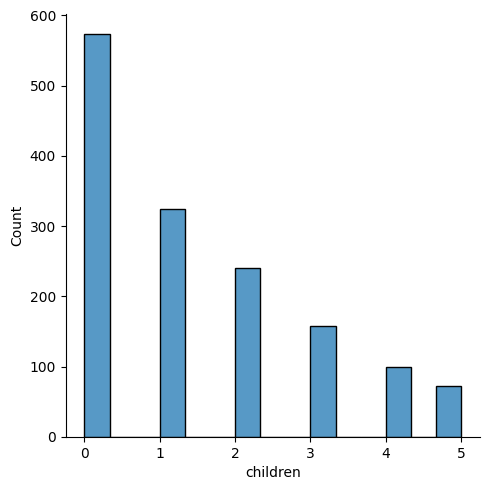

In [ ]:
# Checking the increased frequency
sns.displot(df, x="children")

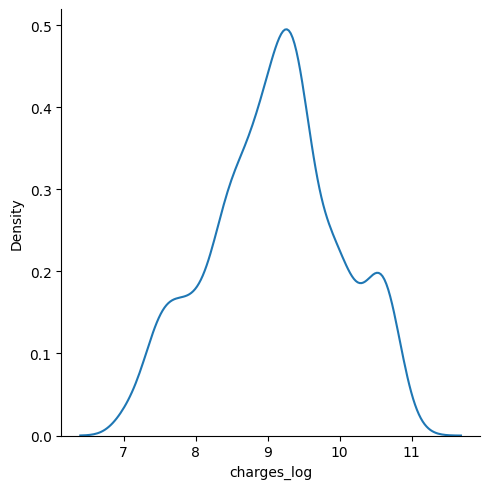

In [ ]:
# Checking the effect in the skew
sns.displot(df, x="charges_log", kind="kde", bw_adjust=1)

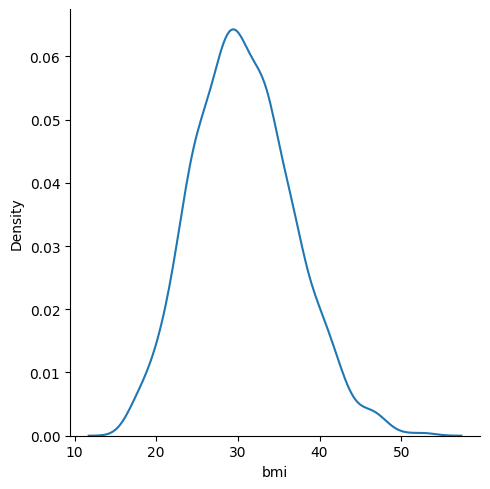

In [ ]:
# Checking the effect in displot for BMI
sns.displot(df, x="bmi", kind="kde", bw_adjust=1)

### 3.2.5 Evaluate distribution of the column `smoker`

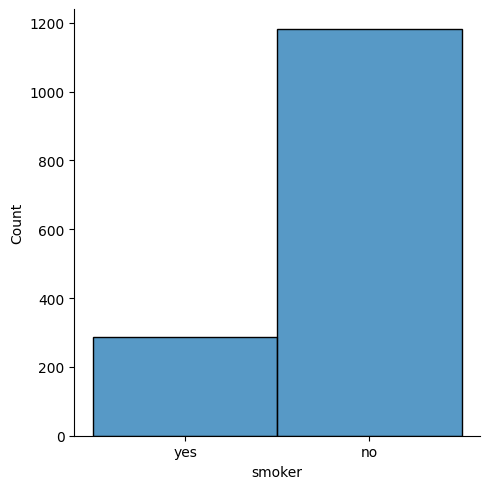

In [ ]:
sns.displot(df, x="smoker")

In [ ]:
# Resample the smoker columns
df_smoker = df[df["smoker"] >= "yes"]
df = pd.concat([df, df_smoker[:100]])

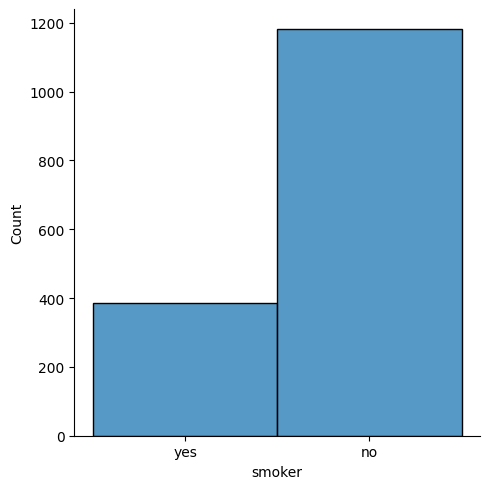

In [ ]:
# Check the distribution
sns.displot(df, x="smoker")

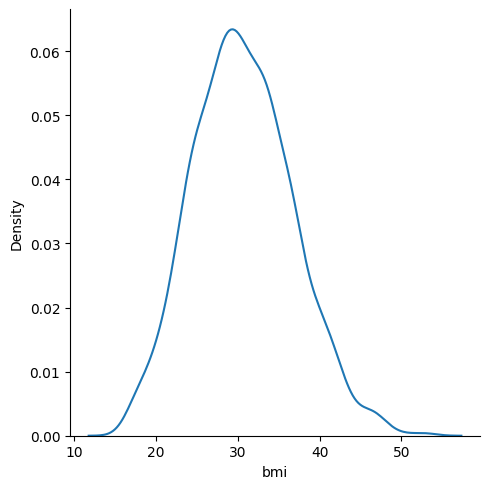

In [ ]:
# Checking the effect in displot for BMI
sns.displot(df, x="bmi", kind="kde", bw_adjust=1)

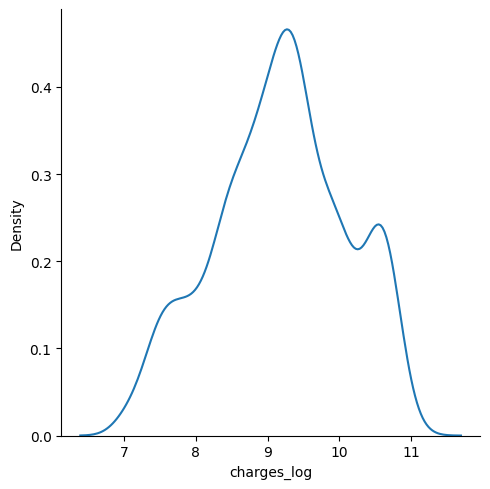

In [ ]:
# Checking the effect in the skew
sns.displot(df, x="charges_log", kind="kde", bw_adjust=1)

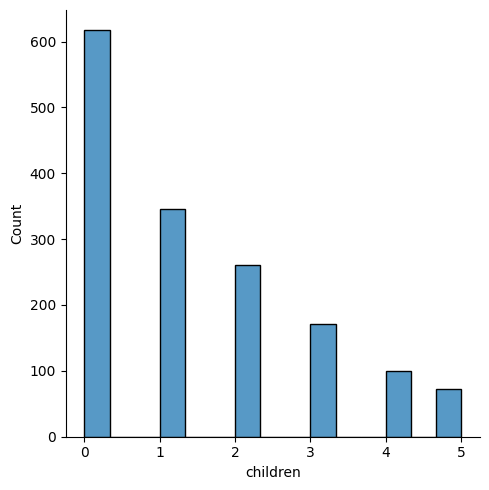

In [ ]:
# Checking the increased frequency
sns.displot(df, x="children")

### 3.2.6 Evaluate distribution of the column `region`

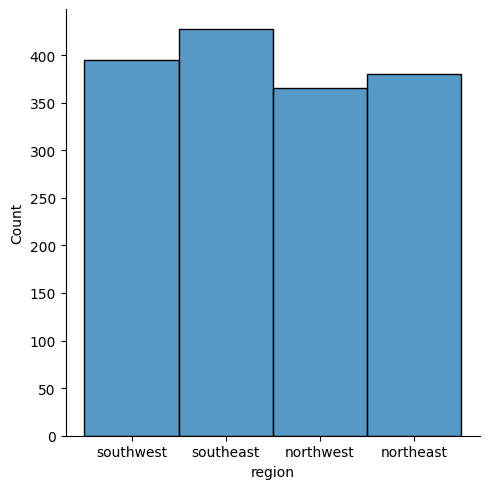

In [ ]:
sns.displot(df, x="region")

### 3.2.7 Evaluate distribution of the column `sex`

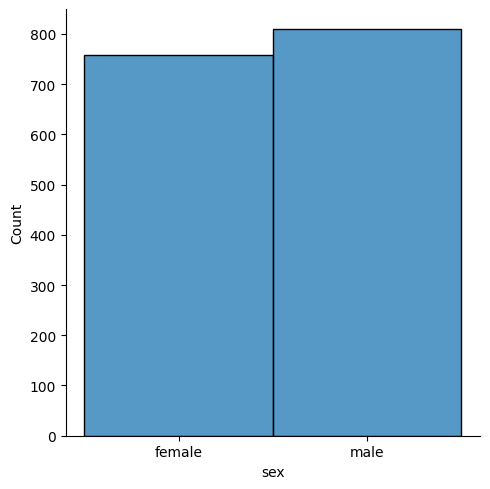

In [ ]:
sns.displot(df, x="sex")

## 3.3 Data processing

### 3.3.1 One hot encode the categorical data

In [ ]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region", "children"], dtype=float)
df.shape

(1567, 18)

### 3.3.2 Create X & Y sets

In [ ]:
# Scale the charges
x_df = df.drop(columns=["charges_log", "charges"], axis=1)
y_scaled_df = df["charges_log"]
y_actual_df = df["charges"]

In [ ]:
x_df.shape

(1567, 16)

In [ ]:
x_tensor = tf.constant(x_df.values, dtype=np.float32)
y_scaled_tensor = tf.constant(y_scaled_df.values, dtype=np.float32)
y_actual_tensor = tf.constant(y_actual_df.values, dtype=np.float32)

### 3.3.3 Create train test split

In [ ]:
boundary = int(0.8 * len(x_tensor))
X_train = x_tensor[:boundary]
X_test = x_tensor[boundary:]
Y_train = y_scaled_tensor[:boundary]
Y_test = y_scaled_tensor[boundary:]
Y_train_actual = y_actual_tensor[:boundary]
Y_test_actual = y_actual_tensor[boundary:]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1253, 16)
(314, 16)
(1253,)
(314,)


## 3.4 Modelling

In [ ]:
tf.random.set_seed(42)

### 3.4.1 Define a model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(X_train.shape[-1]),
    tf.keras.layers.Dense(75),
    tf.keras.layers.LeakyReLU(negative_slope=0.25),
    tf.keras.layers.Dense(125),
    tf.keras.layers.LeakyReLU(negative_slope=0.25),
    tf.keras.layers.Dense(125, activation="relu"),
    tf.keras.layers.Dense(1)
], name="Insurance_model")

### 3.4.2 Compile a model

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    loss = tf.keras.losses.Huber(),
    metrics = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError()]
)

### 3.4.3 Fit a model

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs=150,
                    validation_split=0.2,
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=100, min_delta=0.02)])

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0691 - mean_absolute_error: 2.5267 - mean_squared_error: 10.2535 - val_loss: 0.8614 - val_mean_absolute_error: 1.2803 - val_mean_squared_error: 2.5436
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7798 - mean_absolute_error: 1.1896 - mean_squared_error: 2.2382 - val_loss: 0.9852 - val_mean_absolute_error: 1.4061 - val_mean_squared_error: 2.9982
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7583 - mean_absolute_error: 1.1689 - mean_squared_error: 2.1510 - val_loss: 0.9458 - val_mean_absolute_error: 1.3671 - val_mean_squared_error: 2.7755
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7379 - mean_absolute_error: 1.1466 - mean_squared_error: 2.0548 - val_loss: 0.8515 - val_mean_absolute_error: 1.2647 - val_mean_squared_error: 2.4057
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6429 - mean_absolute_error: 1.0439 - mean_squared_error: 1.7097 - val_loss: 0.5582 - val_mean

### 3.4.4 Viz loss

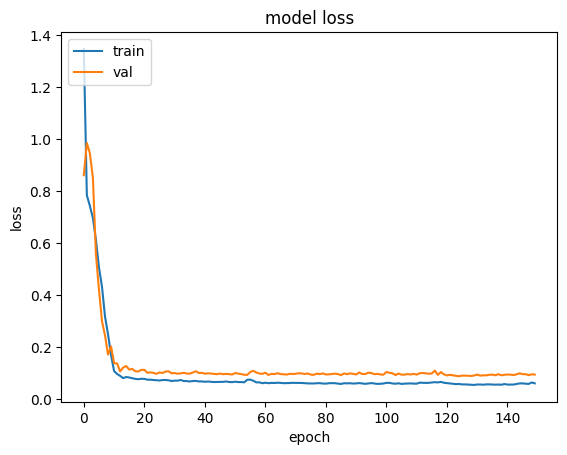

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

### 3.4.5 Check the loss

In [ ]:
y_pred = []
for x in tqdm(X_test):
    y_pred.append(model.predict(tf.reshape(x, shape=(1,16)), verbose=0))

100%|██████████| 314/314 [00:26<00:00, 11.80it/s]


In [ ]:
y_pred_squeezed = [float(y.squeeze()) for y in y_pred]
print(y_pred_squeezed)

[8.977387428283691, 8.394482612609863, 8.911710739135742, 9.512202262878418, 9.528762817382812, 9.614648818969727, 9.220415115356445, 8.428486824035645, 8.277033805847168, 8.932440757751465, 8.977738380432129, 9.514707565307617, 10.169722557067871, 9.352466583251953, 10.292889595031738, 7.737715244293213, 9.261815071105957, 8.17674446105957, 8.123473167419434, 9.202750205993652, 8.51570987701416, 9.780706405639648, 9.429200172424316, 8.361601829528809, 8.477947235107422, 10.114415168762207, 8.5422945022583, 9.120125770568848, 10.257991790771484, 9.4226655960083, 7.427631378173828, 10.726495742797852, 9.043609619140625, 8.145307540893555, 8.697157859802246, 10.587837219238281, 9.009065628051758, 8.792728424072266, 10.389978408813477, 7.278118133544922, 9.291606903076172, 9.393978118896484, 7.328904151916504, 7.304596424102783, 8.609526634216309, 8.880566596984863, 7.745582580566406, 10.131620407104492, 10.516929626464844, 8.010993957519531, 9.952936172485352, 9.90378475189209, 7.8600845

In [ ]:
mae_insurance = np.abs(y_pred_squeezed - Y_test)

In [ ]:
print(np.mean(mae_insurance))

0.18597656


### 3.4.6 Re-scale predictions and calculate loss

In [ ]:
y_pred_rescaled = np.exp(y_pred_squeezed)

In [ ]:
mae_insurance_scaled = np.abs(y_pred_rescaled - Y_test_actual)

In [ ]:
print(np.mean(mae_insurance_scaled))

3056.5002


In [ ]:
# Save a model to keras format
model.save("insurance_model.keras")